# Load required modules and the MNIST dataset

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from sklearn.mixture import BayesianGaussianMixture
from matplotlib import pyplot as plt
from keras.datasets import mnist

# downloads the dataset if needed
dataset = mnist.load_data()
(X, Y), _ = dataset

X = np.reshape(X, (X.shape[0], np.prod(X.shape[1:])))

print("Samples:", X.shape[0])

Using TensorFlow backend.


Samples: 60000


# Defining a Bayes Classifier using Gaussian Mixture Model

In [2]:
class BayesClassifier():    
    def fit(self, X, Y):
        # number of different classes
        self.K = len(set(Y))
        
        # list of gaussians - one for each class
        self.gaussians = []
        
        for k in range(self.K):
            Xk = X[Y==k]
            gmm = BayesianGaussianMixture(20)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
            
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        return gmm.sample()[0]
            
        
        
        

# Runs the code

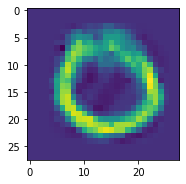

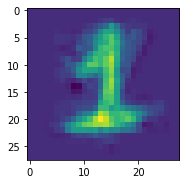

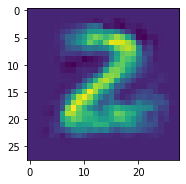

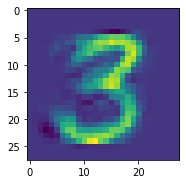

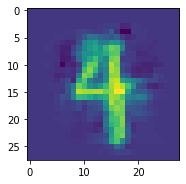

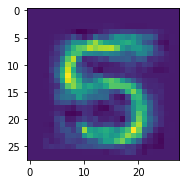

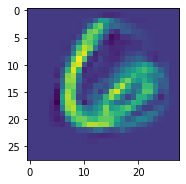

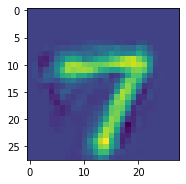

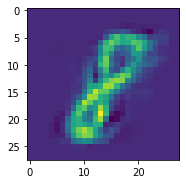

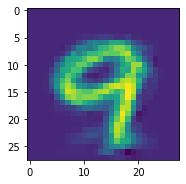

In [3]:
classifier = BayesClassifier()
classifier.fit(X, Y)

for i in range(10):
    plt.subplot(1,2,1)
    plt.imshow(classifier.sample_given_y(i).reshape((28,28)))
    plt.show()
